## Интеллектуальные системы и технологии  
Практика №2. Визуализация в двухмерном пространстве  
Жаров Всеволод, ИММО-01-23

In [2]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import numpy as np
# import matplotlib as mpl
# from matplotlib import cm
# from sklearn.preprocessing import minmax_scale

### Загрузка данных

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets

In [4]:
X.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,...,0.86467,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute1   351 non-null    int64  
 1   Attribute2   351 non-null    int64  
 2   Attribute3   351 non-null    float64
 3   Attribute4   351 non-null    float64
 4   Attribute5   351 non-null    float64
 5   Attribute6   351 non-null    float64
 6   Attribute7   351 non-null    float64
 7   Attribute8   351 non-null    float64
 8   Attribute9   351 non-null    float64
 9   Attribute10  351 non-null    float64
 10  Attribute11  351 non-null    float64
 11  Attribute12  351 non-null    float64
 12  Attribute13  351 non-null    float64
 13  Attribute14  351 non-null    float64
 14  Attribute15  351 non-null    float64
 15  Attribute16  351 non-null    float64
 16  Attribute17  351 non-null    float64
 17  Attribute18  351 non-null    float64
 18  Attribute19  351 non-null    float64
 19  Attribut

In [5]:
y.tail()

,Class
346,g
347,g
348,g
349,g
350,g


In [47]:
np.unique(y)

array(['b', 'g'], dtype=object)

In [6]:
def for_keys(data):
    match data:
        case "g": return 0
        case "b": return 1

In [45]:
y_numbers = [for_keys(p) for p in np.array(y.Class)]
y_numbers[3:7]

[1, 0, 1, 0]

In [9]:
# Функции для построения tsne и umap и быстрой их отрисовки
def some_tsne(data_sc, answers, perplex):
    T = TSNE(n_components=2, perplexity=perplex, random_state=567)
    TSNE_features = pd.DataFrame(data=T.fit_transform(data_sc), columns=["x", "y"])
    TSNE_features["keys"] = answers

    fig = plt.figure()
    sns.scatterplot(data=TSNE_features, x="x", y="y", hue="keys").set_title(f"TSNE {perplex}")
    return fig

def make_tsne(data_sc, answers, perplexities = [15, 25, 35]):
    figures = []
    for p in perplexities:
        figures.append(some_tsne(data_sc, answers, p))
    return figures

def make_umap(data_sc, answers, n_n = (5, 25, 50), m_d = (0.1, 0.6)):
    um = dict()
    for i in range(len(n_n)):
        for j in range(len(m_d)):
            um[(n_n[i], m_d[j])] = (umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=567).fit_transform(data_sc))
            um[(n_n[i], m_d[j])] = pd.DataFrame(um[(n_n[i], m_d[j])], columns = ["x", "y"])
            um[(n_n[i], m_d[j])]["keys"] = answers
    return um

def plot_umap(um, n_n, m_d):
    figures = []
    for i in n_n:
        for j in m_d:
            fig = plt.figure()
            figures.append(sns.scatterplot(data=um[(i, j)], x="x", y="y", hue="keys").set_title(f"UMAP n_n={i}, m_d={j}"))
    return figures

### MinMax Scaler

$$X_{scale}=\frac{x_i-x_{min}}{x_{max} - x_{min}}$$

In [10]:
scaler_minmax = preprocessing.MinMaxScaler()
data_scale_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)
data_scale_minmax.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
346,1.0,0.0,0.917540,0.541490,0.868695,0.426470,0.921745,0.472165,0.952205,0.476890,...,0.976890,0.478990,0.917395,0.500615,1.000000,0.564075,0.933300,0.446430,0.952730,0.478465
347,1.0,0.0,0.975565,0.502095,0.975915,0.486385,0.967190,0.490400,0.972950,0.508030,...,0.972600,0.506805,0.967610,0.524625,0.965795,0.540840,0.970330,0.499825,0.957415,0.523560
348,1.0,0.0,0.973505,0.499830,0.966035,0.483865,0.975885,0.482845,0.977920,0.512230,...,0.969940,0.515965,0.962445,0.512710,0.960600,0.511210,0.962295,0.502210,0.963485,0.497115
349,1.0,0.0,0.953040,0.491715,0.990610,0.490055,0.978455,0.481770,0.928730,0.500550,...,0.955250,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.937015,0.418785
350,1.0,0.0,0.923550,0.567665,0.868190,0.469245,0.939365,0.541300,0.944640,0.454305,...,0.932335,0.424430,0.905735,0.475890,0.891035,0.496485,0.878735,0.466610,0.928820,0.469245


#### TSNE

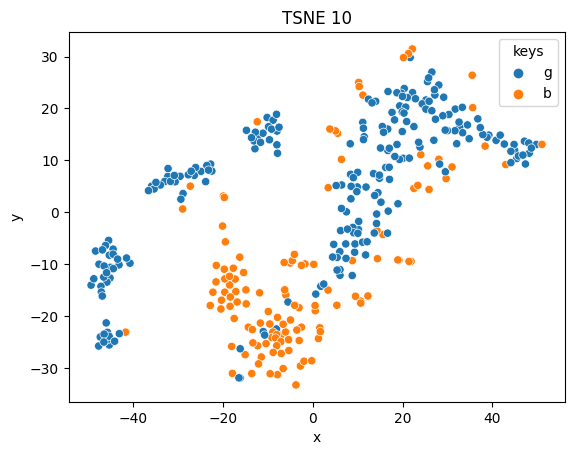

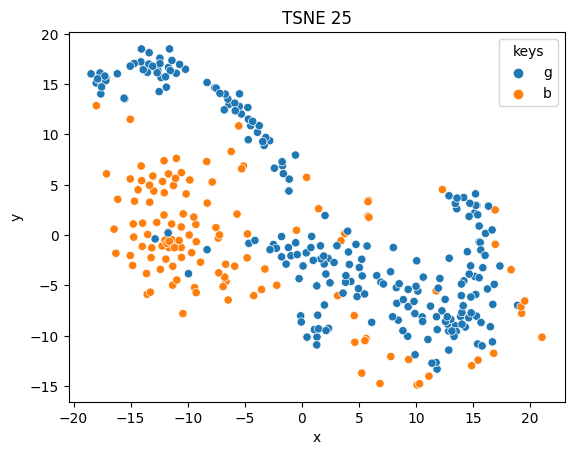

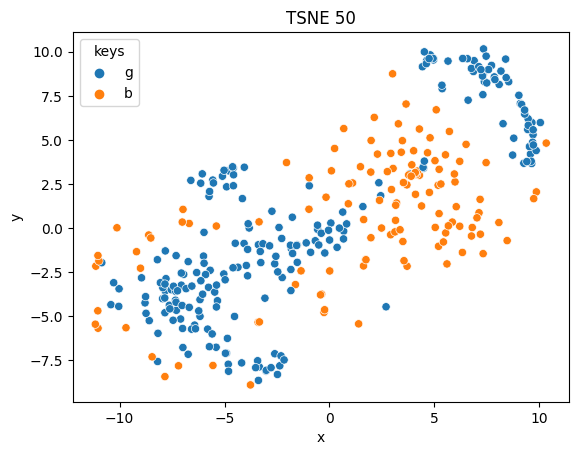

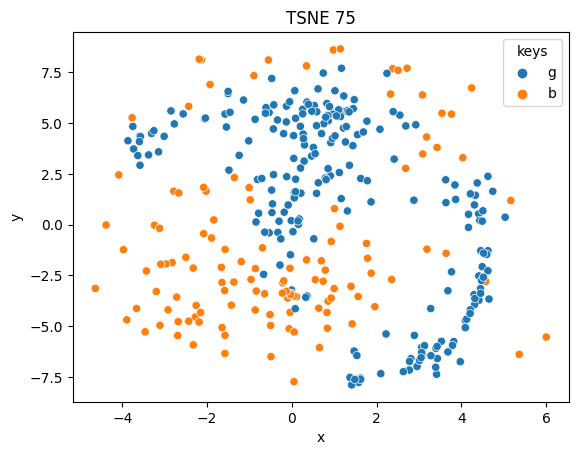

In [53]:
tsne_minmax_plots = make_tsne(data_scale_minmax, y.Class, perplexities=[10, 25, 50, 75])

#### UMAP

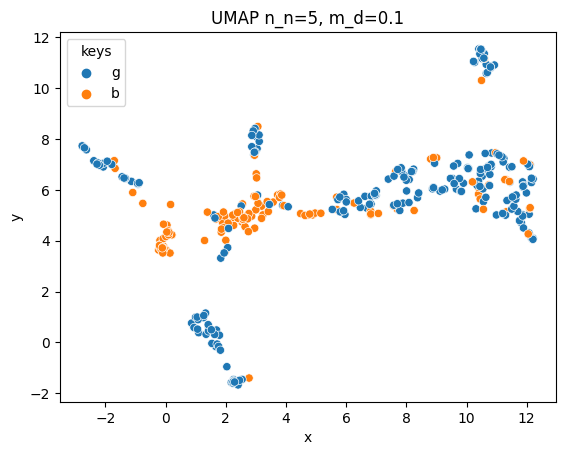

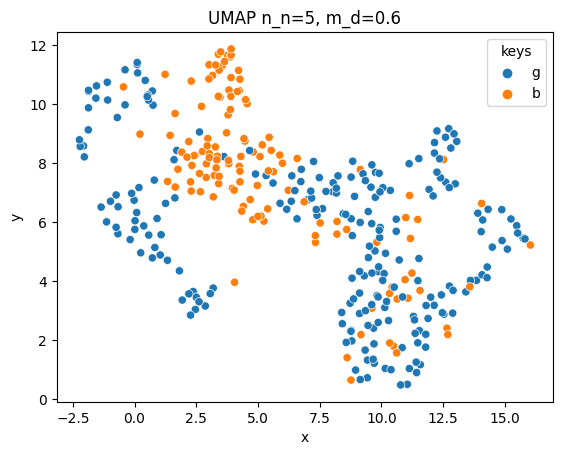

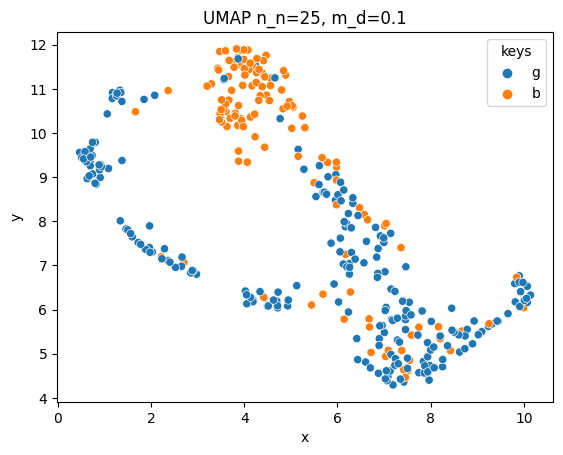

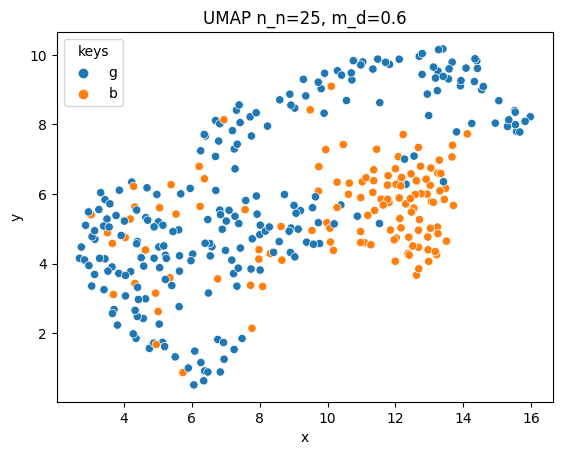

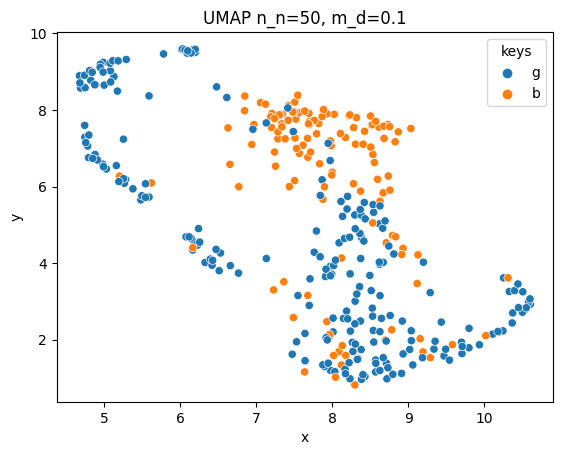

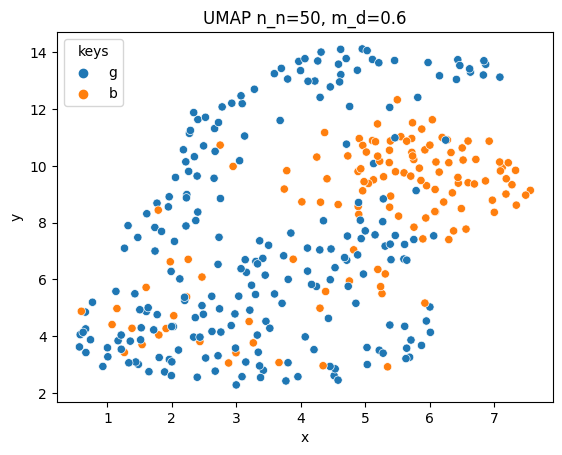

In [54]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = make_umap(data_scale_minmax, y.Class, n_n, m_d)
umap_plots_minmax = plot_umap(um, n_n, m_d)

### Standard Scaler

$$X_{scale}=\frac{x_i-Mx}{\sigma}$$

In [11]:
scaler_standard = preprocessing.StandardScaler()
data_scale_standard = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)
data_scale_standard.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
346,1.0,0.0,0.917540,0.541490,0.868695,0.426470,0.921745,0.472165,0.952205,0.476890,...,0.976890,0.478990,0.917395,0.500615,1.000000,0.564075,0.933300,0.446430,0.952730,0.478465
347,1.0,0.0,0.975565,0.502095,0.975915,0.486385,0.967190,0.490400,0.972950,0.508030,...,0.972600,0.506805,0.967610,0.524625,0.965795,0.540840,0.970330,0.499825,0.957415,0.523560
348,1.0,0.0,0.973505,0.499830,0.966035,0.483865,0.975885,0.482845,0.977920,0.512230,...,0.969940,0.515965,0.962445,0.512710,0.960600,0.511210,0.962295,0.502210,0.963485,0.497115
349,1.0,0.0,0.953040,0.491715,0.990610,0.490055,0.978455,0.481770,0.928730,0.500550,...,0.955250,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.937015,0.418785
350,1.0,0.0,0.923550,0.567665,0.868190,0.469245,0.939365,0.541300,0.944640,0.454305,...,0.932335,0.424430,0.905735,0.475890,0.891035,0.496485,0.878735,0.466610,0.928820,0.469245


#### TSNE

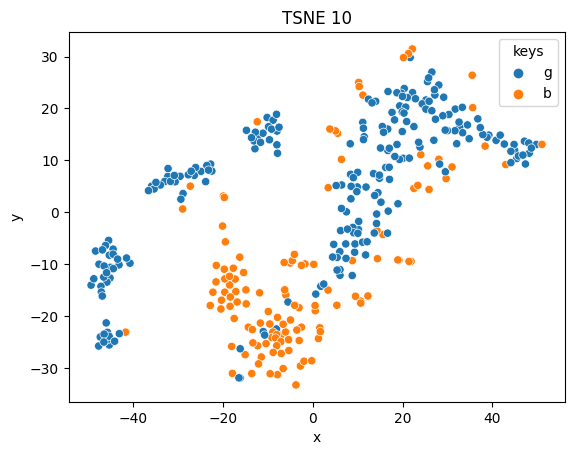

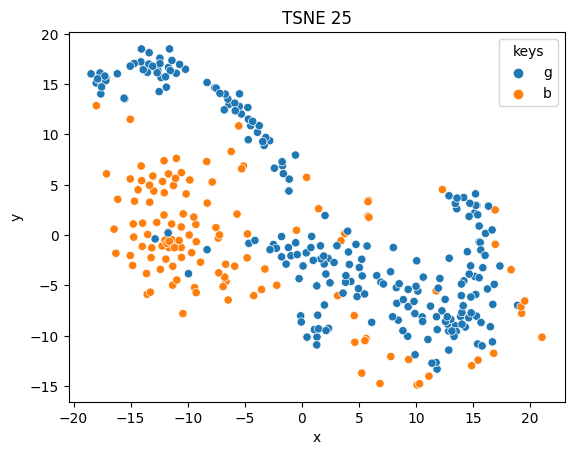

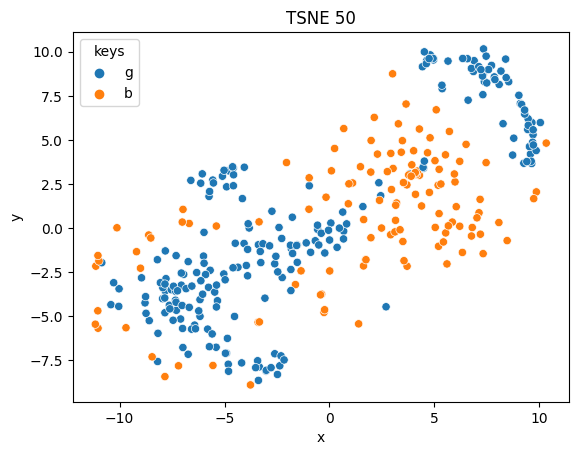

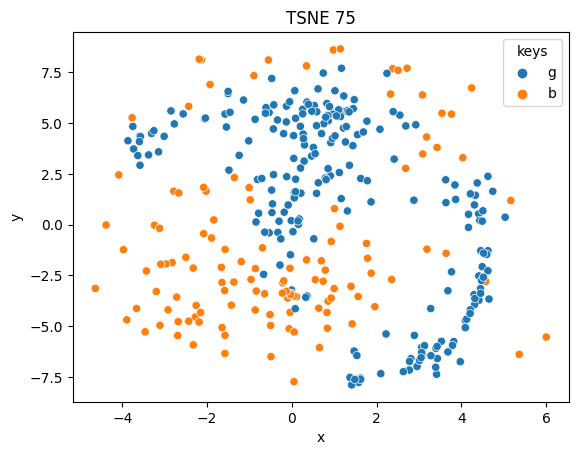

In [51]:
tsne_standard_plots = make_tsne(data_scale_standard, y.Class, perplexities=[10, 25, 50, 75])

#### UMAP

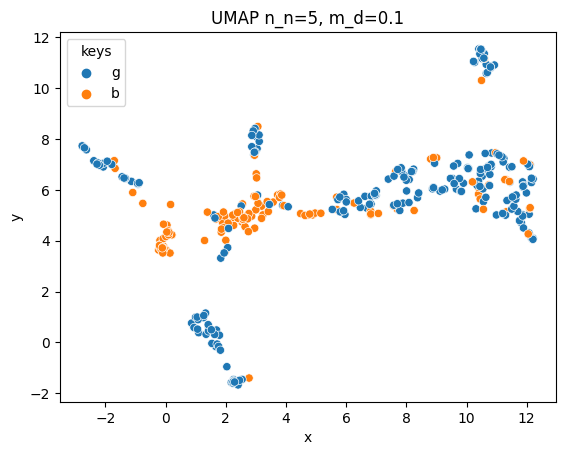

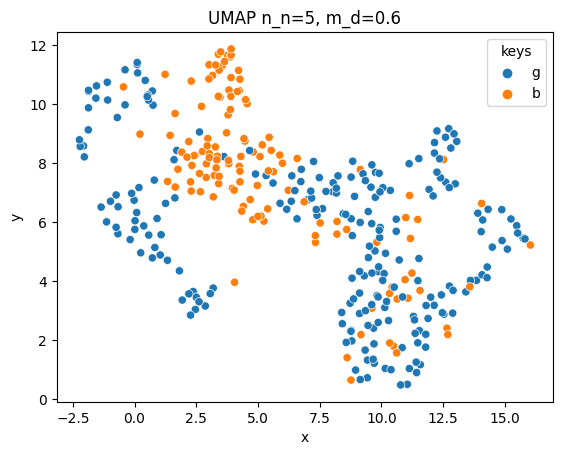

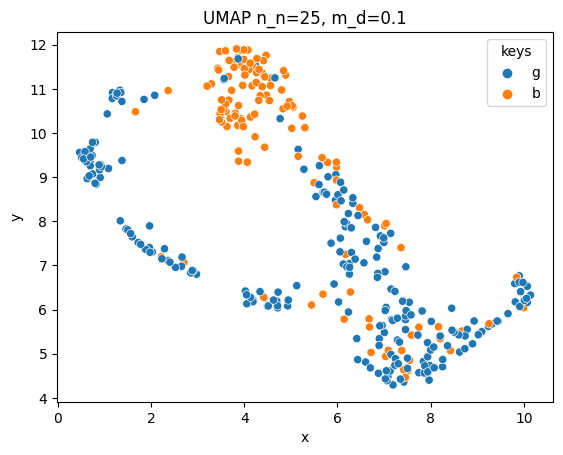

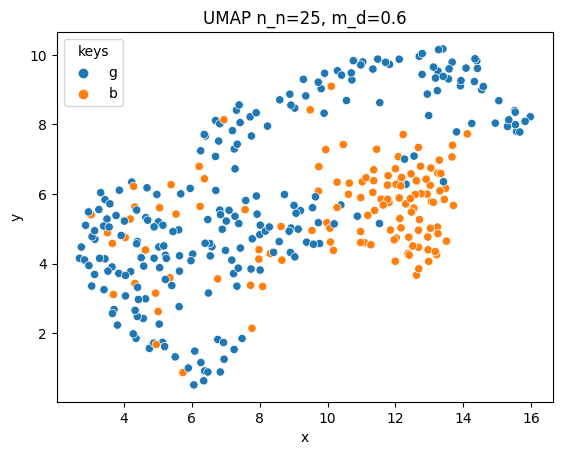

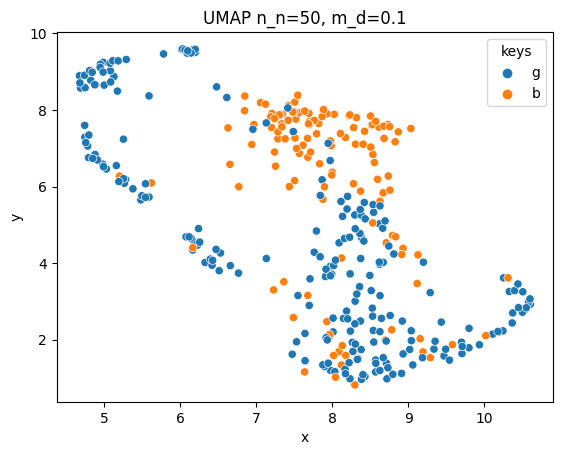

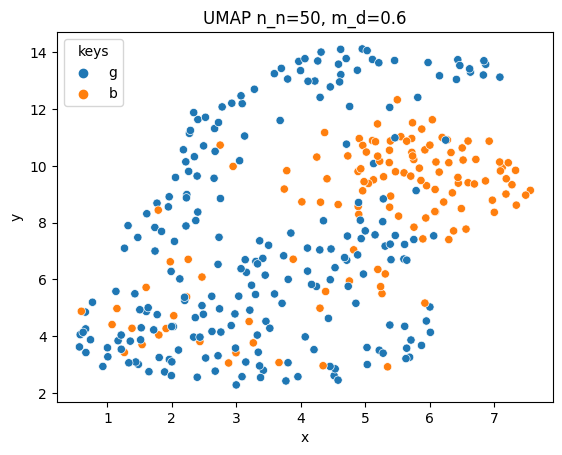

In [52]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = make_umap(data_scale_standard, y.Class, n_n, m_d)
umap_plots_standard = plot_umap(um, n_n, m_d)

### Robust Scaler

$$X_{scale}=\frac{x_i-x_{median}}{x_{75} - x_{25}}$$

In [12]:
scaler_robust = preprocessing.RobustScaler()
data_scale_robust = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)
data_scale_robust.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
346,1.0,0.0,0.917540,0.541490,0.868695,0.426470,0.921745,0.472165,0.952205,0.476890,...,0.976890,0.478990,0.917395,0.500615,1.000000,0.564075,0.933300,0.446430,0.952730,0.478465
347,1.0,0.0,0.975565,0.502095,0.975915,0.486385,0.967190,0.490400,0.972950,0.508030,...,0.972600,0.506805,0.967610,0.524625,0.965795,0.540840,0.970330,0.499825,0.957415,0.523560
348,1.0,0.0,0.973505,0.499830,0.966035,0.483865,0.975885,0.482845,0.977920,0.512230,...,0.969940,0.515965,0.962445,0.512710,0.960600,0.511210,0.962295,0.502210,0.963485,0.497115
349,1.0,0.0,0.953040,0.491715,0.990610,0.490055,0.978455,0.481770,0.928730,0.500550,...,0.955250,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.937015,0.418785
350,1.0,0.0,0.923550,0.567665,0.868190,0.469245,0.939365,0.541300,0.944640,0.454305,...,0.932335,0.424430,0.905735,0.475890,0.891035,0.496485,0.878735,0.466610,0.928820,0.469245


#### TSNE

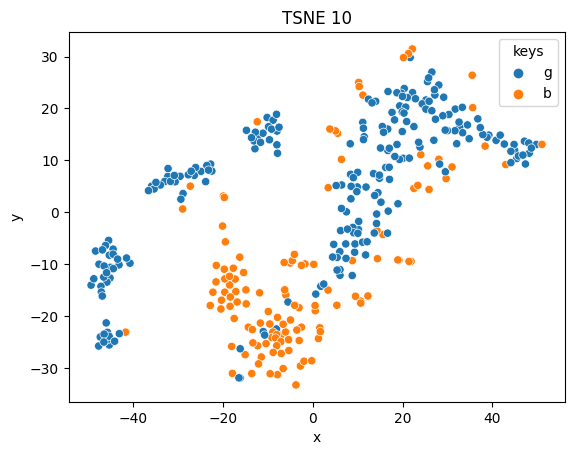

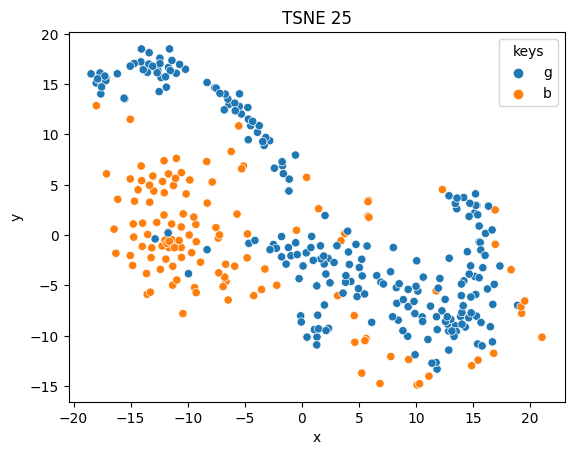

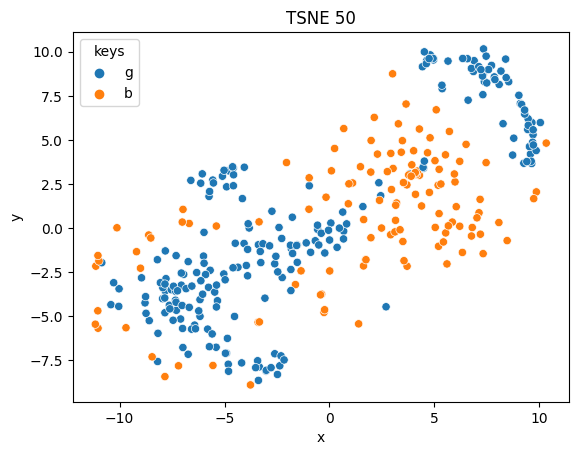

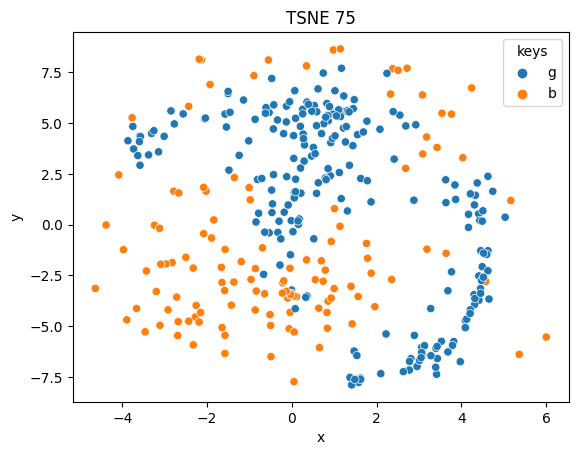

In [55]:
tsne_robust_plots = make_tsne(data_scale_robust, y.Class, perplexities=[10, 25, 50, 75])

#### UMAP

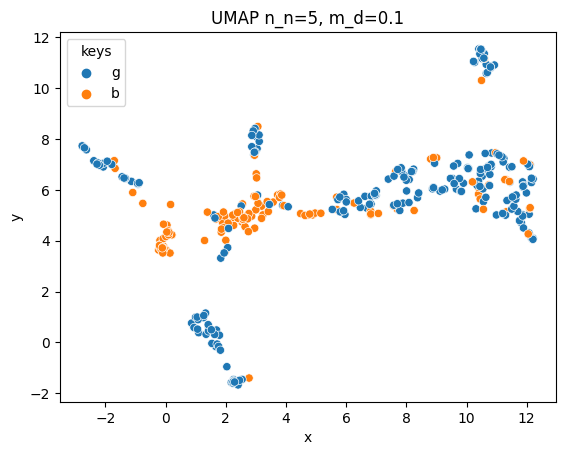

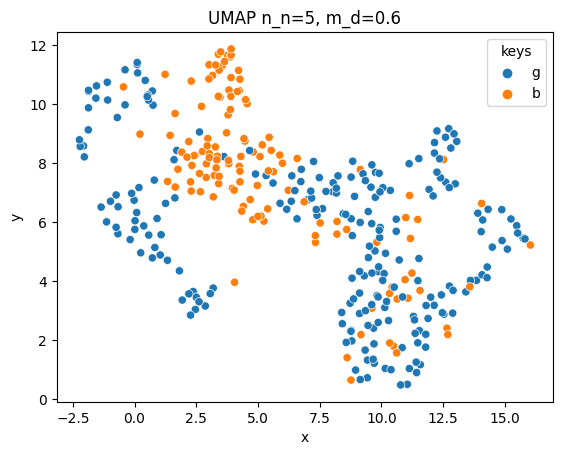

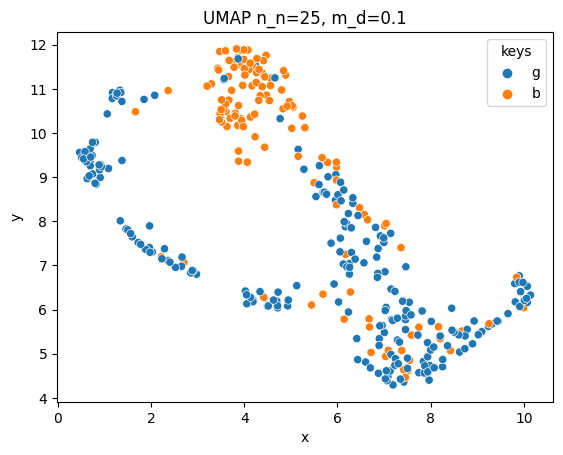

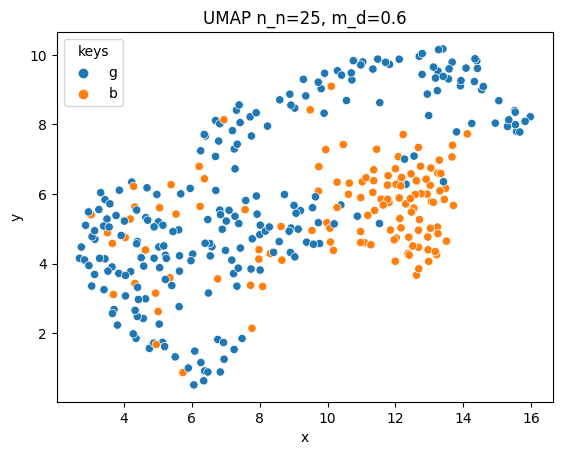

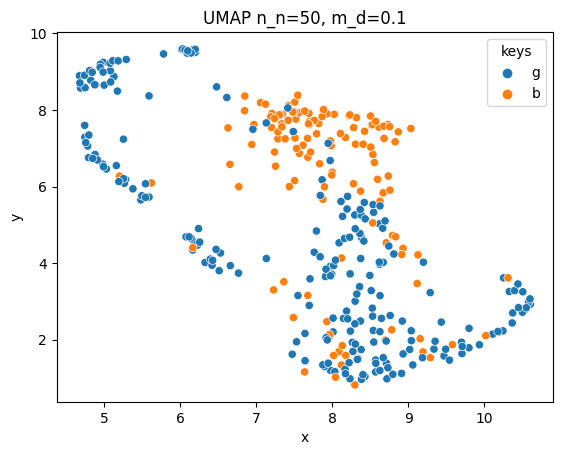

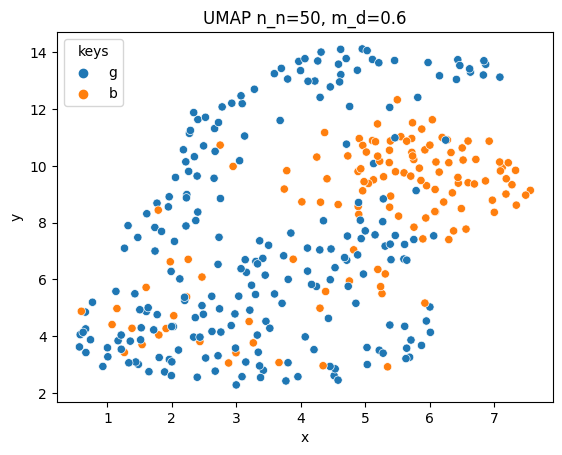

In [56]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = make_umap(data_scale_robust, y.Class, n_n, m_d)
umap_plots_robust = plot_umap(um, n_n, m_d)

### Сравнение

In [40]:
FS = (15, 15)
AL = 1.0
S = 10
LW = 0.3

def make_plots(datas, at1, at2, need_scale = True):
    if need_scale:
        fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=FS)
    else:
        fig, axs = plt.subplots(2, 2, figsize=FS)

    x00 = datas[0]
    x01 = datas[1]
    x10 = datas[2]
    x11 = datas[3]

    axs[0, 0].scatter(x00[at1], x00[at2], alpha=AL, marker="o", s=S, lw=0, c=y_numbers)
    axs[0, 1].scatter(x01[at1], x01[at2], alpha=AL, marker="o", s=S, lw=LW, c=y_numbers)
    axs[1, 0].scatter(x10[at1], x10[at2], alpha=AL, marker="o", s=S, lw=LW, c=y_numbers)
    axs[1, 1].scatter(x11[at1], x11[at2], alpha=AL, marker="o", s=S, lw=LW, c=y_numbers)
    plt.show()

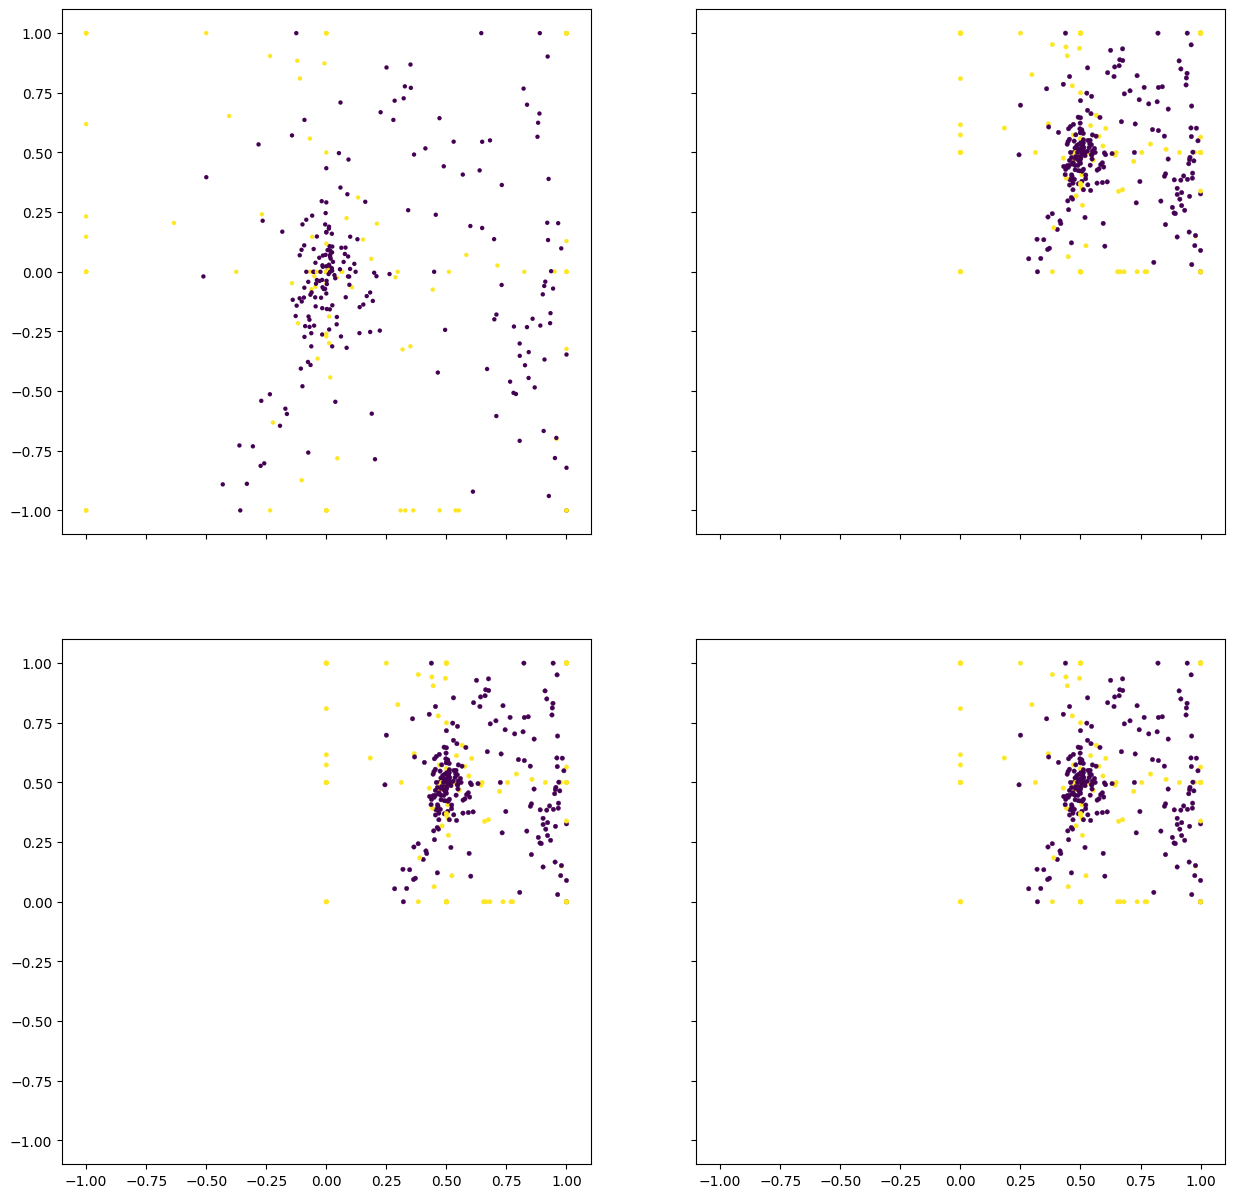

In [43]:
make_plots(
    datas = [X, data_scale_minmax, data_scale_standard, data_scale_robust],
    at1 = "Attribute10",
    at2 = "Attribute32"
)

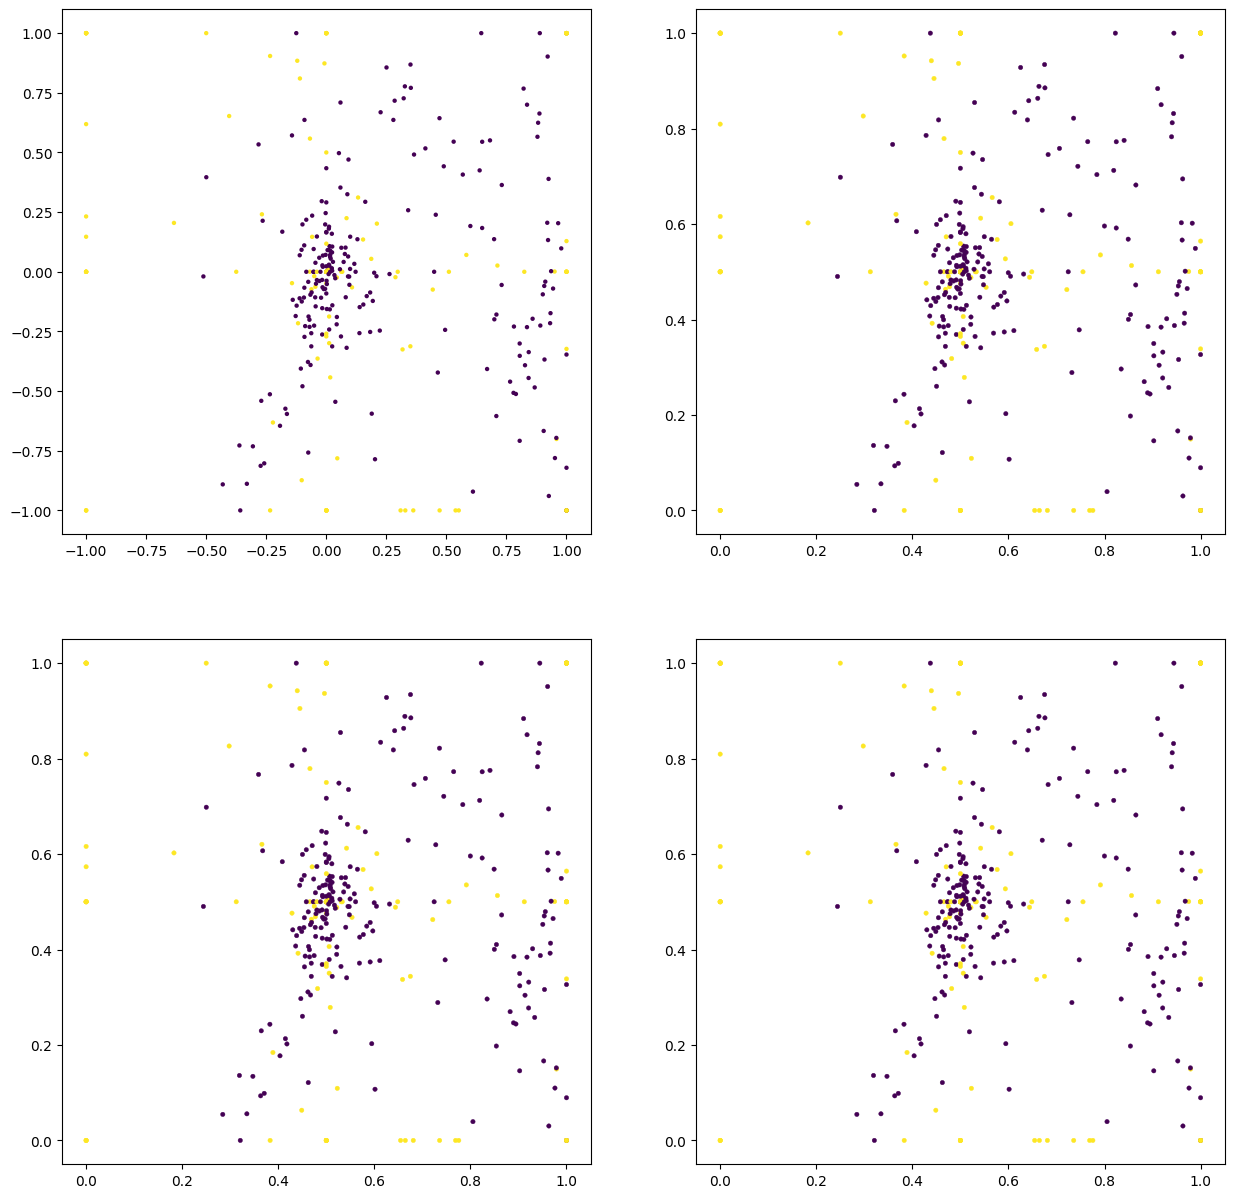

In [44]:
make_plots(
    datas = [X, data_scale_minmax, data_scale_standard, data_scale_robust],
    at1 = "Attribute10",
    at2 = "Attribute32",
    need_scale=False
)

Таким образом, можно сказать, что все варианты масштабирования выдают одинаковые результаты - данные не меняют своего расположения относительно друг друга, но их диапазон меняется на [0, 1]

#### Мусор

А тут неудавшаяся резализация кода с сайта для сравнения

In [18]:
X.Attribute1

0      1
1      1
2      1
3      1
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: Attribute1, Length: 351, dtype: int64

In [50]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    cmap = getattr(cm, "plasma_r", cm.hot_r)
    colors = cmap(y)
    # colors = y
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)
    # ax.scatter(X.Attribute14, X.Attribute15, alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
        # X.Attribute15, bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
        # X.Attribute14, bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

def make_plot(X, y, title):
    # title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    # y_minmax_scale = minmax_scale(y)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        # x0_label=feature_mapping[features[0]],
        # x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)

    cutoffs = []
    for i in range(X.shape[1]):
        cutoffs.append(np.percentile(X[:, i], zoom_in_percentile_range))

    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)
    # cutoffs_X0 = np.percentile(X.Attribute14, zoom_in_percentile_range)
    # cutoffs_X1 = np.percentile(X.Attribute15, zoom_in_percentile_range)

    # temp = X > [cutoffs_X0[0], cutoffs_X1[0]]
    temp = X > cutoffs

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1)


    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        # x0_label=feature_mapping[features[0]],
        # x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    cmap = getattr(cm, "plasma_r", cm.hot_r)

    norm = mpl.colors.Normalize(y.min(), y.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

In [54]:
a = [1, 2, 3]
b = [0, 1, 1]
print(a > b)
print(np.all(a > b, axis=0))

True
True


ValueError: operands could not be broadcast together with shapes (351,34) (34,2) 

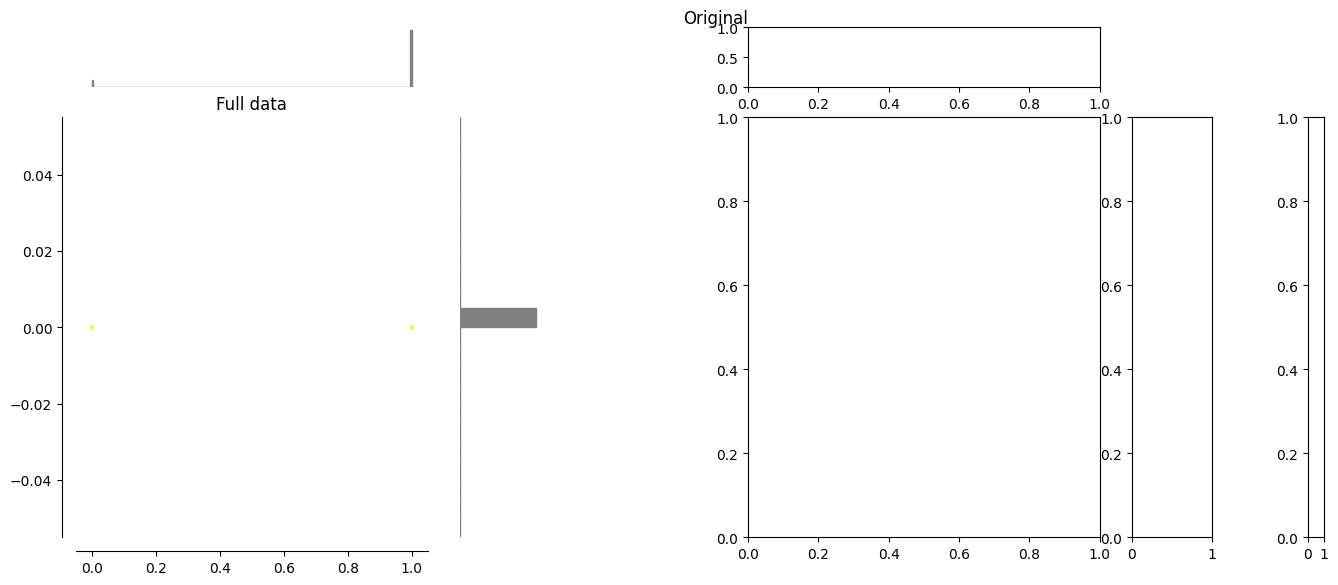

In [51]:
make_plot(X.values, y_numbers, "Original")